# Lab 06 - Bài Tập

### Bài 1: Tạo quần thể mô phỏng

Bạn hãy tạo một mẫu gồm 10000 phần tử mô phỏng chiều cao của nam thanh niên có giá trị từ 120cm - 200cm. Bạn hãy lưu kết quả vào biến **POP**.

Tính:
a. Chiều cao trung bình (kỳ vọng) của quần thể và độ lệch chuẩn về chiều cao của quần thể.

b. Tính tỷ lệ người cao trong quần thể, biết rằng thanh niên có chiều cao từ 180 trở lên được gọi là cao.

c. Vẽ histogram về chiều cao của quần thể. Theo bạn quần thể có phân phối chuẩn hay không?

d. Thử vẽ histogram và đồ thị hàm mật độ của phân phối chuẩn sử dụng tham số loc và scale bằng với kỳ vọng và độ lệch chuẩn của quần thể.

thanh nien nay:  [174.96714153 168.61735699 176.47688538 185.23029856 167.65846625
 167.65863043 185.79212816 177.67434729 165.30525614 175.42560044]
Chiều cao trung bình của quần thể: 169.97 cm
Độ lệch chuẩn của quần thể: 10.02 cm
Tỷ lệ người cao (≥180cm): 15.93%


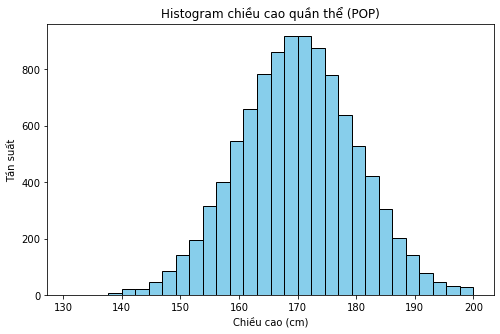

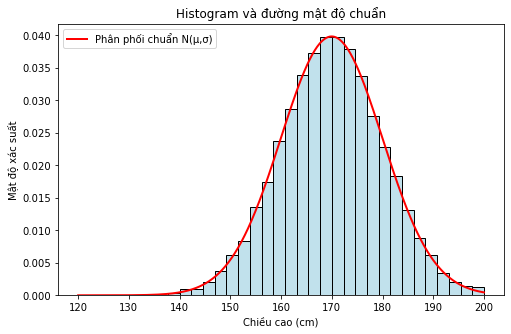

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

#a>

# tao ngau nhien 10k phan tu
# seed(42) la lap lai phan tu
np.random.seed(42)
# tao quan the mo phong
POP = np.random.normal(loc=170, scale=10, size=10000)
# chieu cao tu 120cm-200cm
POP = np.clip(POP, 120, 200)
# coi 1 thanh nien dau tien hihihi
print("thanh nien nay: ", POP[:10])

mean_height = np.mean(POP)
std_height = np.std(POP)

print(f"Chiều cao trung bình của quần thể: {mean_height:.2f} cm")
print(f"Độ lệch chuẩn của quần thể: {std_height:.2f} cm")

#b>

tall_ratio = np.sum(POP >= 180) / len(POP)
print(f"Tỷ lệ người cao (≥180cm): {tall_ratio:.2%}")

#c>

plt.figure(figsize=(8,5))
plt.hist(POP, bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram chiều cao quần thể (POP)")
plt.xlabel("Chiều cao (cm)")
plt.ylabel("Tần suất")
plt.show()


#d>


plt.figure(figsize=(8,5))
sns.histplot(POP, bins=30, kde=False, color='lightblue', stat='density')

# Vẽ đường mật độ chuẩn với loc và scale bằng trung bình & độ lệch chuẩn của quần thể
x = np.linspace(120, 200, 500)
plt.plot(x, norm.pdf(x, loc=mean_height, scale=std_height), 'r-', linewidth=2, label='Phân phối chuẩn N(μ,σ)')
plt.title("Histogram và đường mật độ chuẩn")
plt.xlabel("Chiều cao (cm)")
plt.ylabel("Mật độ xác suất")
plt.legend()
plt.show()



### Bài 2: Lấy mẫu cỡ 20

Bạn hãy lấy một mẫu kích thước 20 phần từ. Tính:

a. Trung bình mẫu, và độ lệch chuẩn của mẫu

b. Tỷ lệ người cao của mẫu

c. Vẽ histogram của mẫu

d. Thử vẽ đồ thị hàm mật độ của phân phối chuẩn với tham số loc và scale bằng với giá trị trung bình và độ lệch chuẩn và chiều cao của mẫu. Bạn có nhận xét gì không?

Mẫu 20 phần tử đầu tiên: [176.90472686 186.25958915 166.06648875 168.03650151 157.06492375
 175.5101706  160.066413   171.64294765 160.44877421 138.29574264
 176.93923233 177.32492103 183.99355437 178.50221742 171.76150452
 159.01083745 174.3693817  158.06363168 167.53664719 174.96199187]
Trung bình mẫu: 169.14 cm
Độ lệch chuẩn mẫu: 11.23 cm
Tỷ lệ người cao (≥180cm) trong mẫu: 10.00%


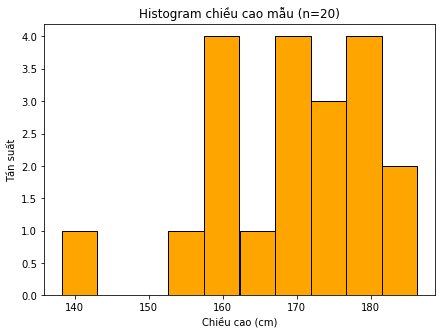

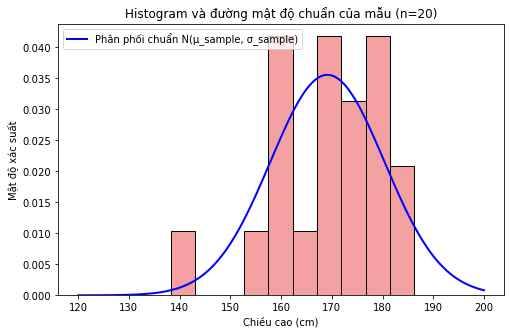

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Lấy mẫu 20 phần tử ngẫu nhiên từ quần thể POP
sample = np.random.choice(POP, size=20, replace=False)

print("Mẫu 20 phần tử đầu tiên:", sample)


#a>
mean_sample = np.mean(sample)
std_sample = np.std(sample, ddof=1)  # ddof=1 để tính theo mẫu (sample standard deviation)

print(f"Trung bình mẫu: {mean_sample:.2f} cm")
print(f"Độ lệch chuẩn mẫu: {std_sample:.2f} cm")

#b>
tall_ratio_sample = np.sum(sample >= 180) / len(sample)
print(f"Tỷ lệ người cao (≥180cm) trong mẫu: {tall_ratio_sample:.2%}")

#c>
plt.figure(figsize=(7,5))
plt.hist(sample, bins=10, color='orange', edgecolor='black')
plt.title("Histogram chiều cao mẫu (n=20)")
plt.xlabel("Chiều cao (cm)")
plt.ylabel("Tần suất")
plt.show()


#d>
plt.figure(figsize=(8,5))
sns.histplot(sample, bins=10, stat='density', color='lightcoral', edgecolor='black')

# Vẽ đường mật độ chuẩn theo trung bình & độ lệch chuẩn của mẫu
x = np.linspace(120, 200, 500)
plt.plot(x, norm.pdf(x, loc=mean_sample, scale=std_sample), 'b-', linewidth=2, label='Phân phối chuẩn N(μ_sample, σ_sample)')

plt.title("Histogram và đường mật độ chuẩn của mẫu (n=20)")
plt.xlabel("Chiều cao (cm)")
plt.ylabel("Mật độ xác suất")
plt.legend()
plt.show()


### Bài 3: Lấy mẫu cỡ 100

Lặp lại thí nghiệm bài 2 với cỡ mẫu là 100

5 giá trị đầu tiên của mẫu 100 phần tử: [179.04017555 169.06363811 165.46751591 162.14013967 178.43105332]
Trung bình mẫu (n=100): 169.82 cm
Độ lệch chuẩn mẫu (n=100): 8.50 cm
Tỷ lệ người cao (≥180cm) trong mẫu (n=100): 11.00%


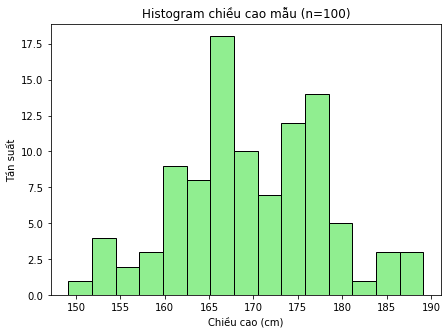

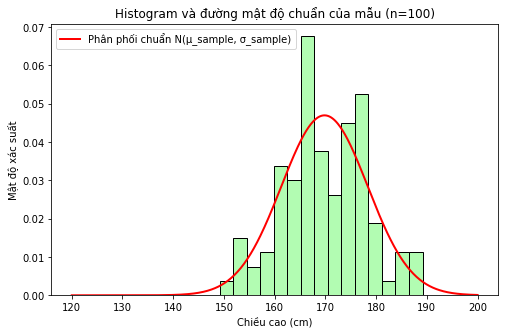

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Lấy mẫu ngẫu nhiên 100 phần tử từ quần thể POP
sample_100 = np.random.choice(POP, size=100, replace=False)

print("5 giá trị đầu tiên của mẫu 100 phần tử:", sample_100[:5])

#a>
mean_sample_100 = np.mean(sample_100)
std_sample_100 = np.std(sample_100, ddof=1)

print(f"Trung bình mẫu (n=100): {mean_sample_100:.2f} cm")
print(f"Độ lệch chuẩn mẫu (n=100): {std_sample_100:.2f} cm")

#b>
tall_ratio_100 = np.sum(sample_100 >= 180) / len(sample_100)
print(f"Tỷ lệ người cao (≥180cm) trong mẫu (n=100): {tall_ratio_100:.2%}")

#c>
plt.figure(figsize=(7,5))
plt.hist(sample_100, bins=15, color='lightgreen', edgecolor='black')
plt.title("Histogram chiều cao mẫu (n=100)")
plt.xlabel("Chiều cao (cm)")
plt.ylabel("Tần suất")
plt.show()

#d>
plt.figure(figsize=(8,5))
sns.histplot(sample_100, bins=15, stat='density', color='palegreen', edgecolor='black')

# Vẽ đường mật độ chuẩn tương ứng với trung bình & độ lệch chuẩn của mẫu
x = np.linspace(120, 200, 500)
plt.plot(x, norm.pdf(x, loc=mean_sample_100, scale=std_sample_100),
         'r-', linewidth=2, label='Phân phối chuẩn N(μ_sample, σ_sample)')

plt.title("Histogram và đường mật độ chuẩn của mẫu (n=100)")
plt.xlabel("Chiều cao (cm)")
plt.ylabel("Mật độ xác suất")
plt.legend()
plt.show()


### Bài 4: Khảo sát phân phối của trung bình mẫu

a. Thực hiện bài 2 100 lần, mỗi lần bạn tính được trung bình mẫu. Vẽ đồ thị histogram cho 100 trung bình mẫu bạn tính được.

b. Thực hiện bài 3 100 lần, mỗi lần bạn tính được trung bình mẫu. Vẽ đồ thị histogram cho 100 trung bình mẫu bạn tính được.

c. Vẽ histogram của hai câu a, b trong cùng một hình để so sánh. Theo bạn hình dạng của histogram thay đổi nói lên điều gì?

Gợi ý: tạo một danh sách rỗng để chứa các trung bình mẫu tính được, sử dụng hàm append() để thêm giá trị trung bình vào danh sách sau mỗi lần tính.

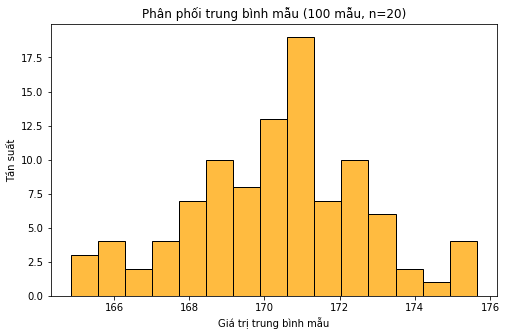

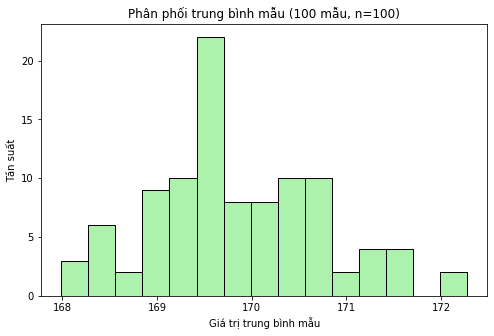

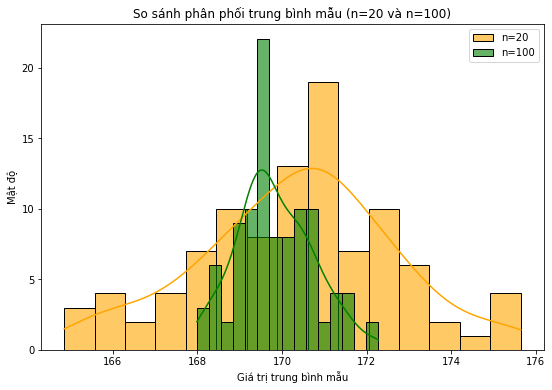

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#a>

# Khởi tạo danh sách rỗng để lưu trung bình mẫu
means_n20 = []

# Lặp 100 lần: mỗi lần lấy mẫu 20 phần tử và tính trung bình
for i in range(100):
    sample = np.random.choice(POP, size=20, replace=False)
    means_n20.append(np.mean(sample))

# Chuyển sang mảng numpy cho tiện xử lý
means_n20 = np.array(means_n20)

# Vẽ histogram
plt.figure(figsize=(8,5))
sns.histplot(means_n20, bins=15, color='orange', edgecolor='black')
plt.title("Phân phối trung bình mẫu (100 mẫu, n=20)")
plt.xlabel("Giá trị trung bình mẫu")
plt.ylabel("Tần suất")
plt.show()

#b>
means_n100 = []

for i in range(100):
    sample = np.random.choice(POP, size=100, replace=False)
    means_n100.append(np.mean(sample))

means_n100 = np.array(means_n100)

plt.figure(figsize=(8,5))
sns.histplot(means_n100, bins=15, color='lightgreen', edgecolor='black')
plt.title("Phân phối trung bình mẫu (100 mẫu, n=100)")
plt.xlabel("Giá trị trung bình mẫu")
plt.ylabel("Tần suất")
plt.show()

#c>
plt.figure(figsize=(9,6))
sns.histplot(means_n20, bins=15, color='orange', label='n=20', alpha=0.6, kde=True)
sns.histplot(means_n100, bins=15, color='green', label='n=100', alpha=0.6, kde=True)
plt.title("So sánh phân phối trung bình mẫu (n=20 và n=100)")
plt.xlabel("Giá trị trung bình mẫu")
plt.ylabel("Mật độ")
plt.legend()
plt.show()
# => với cỡ mẫu n = 20 thì biểu đồ histogram phân phối roongm ít đối xứng
# và dao động mạnh, trung bình thì mẫu chưa ổn định

#=> với cỡ mẫu n = 40 thì phân phối hẹp, gần chuẩn, dao động nhỏ, trung bình mẫu tập trung quanh giá trị thật




### Bài 5: Khảo sát tỷ lệ mẫu

a. Bạn hãy mô phỏng 1000 lần lấy mẫu có kích cỡ 100. Vẽ histogram tỷ lệ người cao của các mẫu

b. Bạn hãy mô phỏng 1000 lần lấy mẫu có kích cỡ 500. Vẽ histogram tỷ lệ người cao của các mẫu

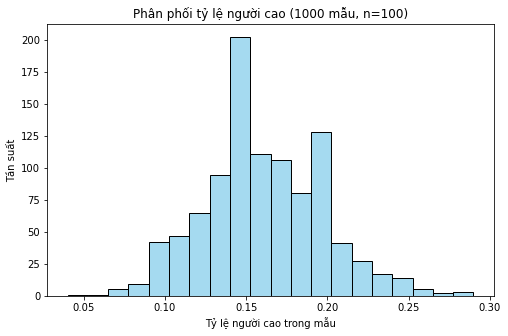

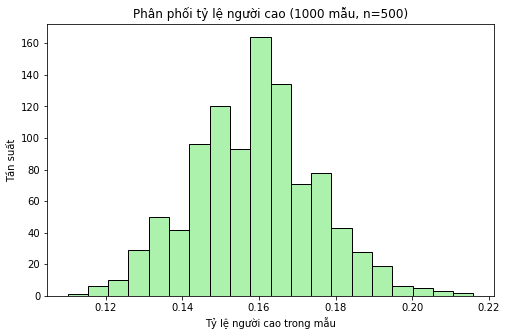

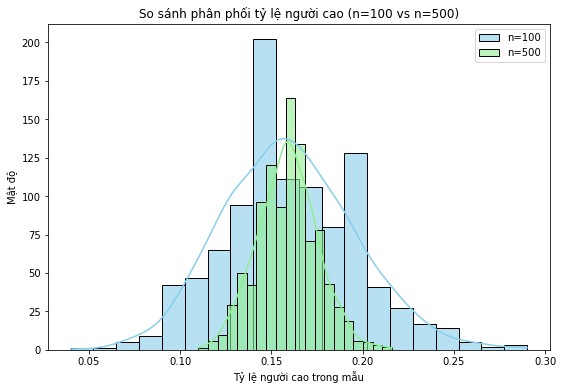

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#a>
ratios_n100 = []

for i in range(1000):
    sample = np.random.choice(POP, size=100, replace=False)
    tall_ratio = np.sum(sample >= 180) / len(sample)
    ratios_n100.append(tall_ratio)

ratios_n100 = np.array(ratios_n100)

# Vẽ histogram
plt.figure(figsize=(8,5))
sns.histplot(ratios_n100, bins=20, color='skyblue', edgecolor='black')
plt.title("Phân phối tỷ lệ người cao (1000 mẫu, n=100)")
plt.xlabel("Tỷ lệ người cao trong mẫu")
plt.ylabel("Tần suất")
plt.show()

#b>
ratios_n500 = []

for i in range(1000):
    sample = np.random.choice(POP, size=500, replace=False)
    tall_ratio = np.sum(sample >= 180) / len(sample)
    ratios_n500.append(tall_ratio)

ratios_n500 = np.array(ratios_n500)

# Vẽ histogram
plt.figure(figsize=(8,5))
sns.histplot(ratios_n500, bins=20, color='lightgreen', edgecolor='black')
plt.title("Phân phối tỷ lệ người cao (1000 mẫu, n=500)")
plt.xlabel("Tỷ lệ người cao trong mẫu")
plt.ylabel("Tần suất")
plt.show()

# cau nay de so sanh 2 mau

plt.figure(figsize=(9,6))
sns.histplot(ratios_n100, bins=20, color='skyblue', label='n=100', kde=True, alpha=0.6)
sns.histplot(ratios_n500, bins=20, color='lightgreen', label='n=500', kde=True, alpha=0.6)
plt.title("So sánh phân phối tỷ lệ người cao (n=100 vs n=500)")
plt.xlabel("Tỷ lệ người cao trong mẫu")
plt.ylabel("Mật độ")
plt.legend()
plt.show()



### Bài 6: Khảo sát phương sai mẫu

Bạn hãy mô phỏng 1000 lần lấy mẫu có kích cỡ 100. Vẽ histogram đại lượng phương sai của các mẫu (Phương sai bằng bình phương độ lệch chuẩn)

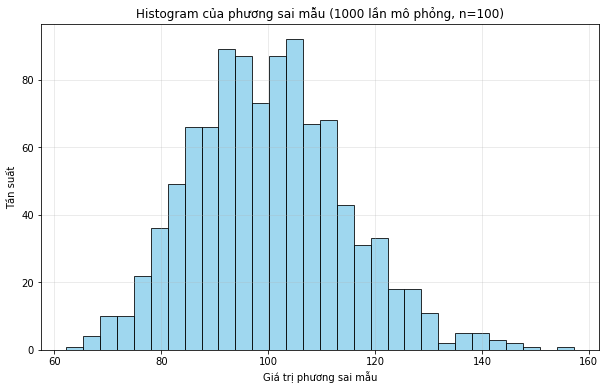

Phương sai trung bình: 100.07897010671256
Độ lệch chuẩn của phương sai mẫu: 14.331130589499228


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Giả sử chiều cao trong quần thể ~ N(170, 10^2)
mu = 170   # trung bình
sigma = 10 # độ lệch chuẩn

sample_size = 100
variances = []  # danh sách chứa phương sai mẫu

# Mô phỏng 1000 lần lấy mẫu
for i in range(1000):
    sample = np.random.normal(mu, sigma, sample_size)
    var = np.var(sample, ddof=1)  # ddof=1 để tính phương sai mẫu
    variances.append(var)

# ---- Vẽ histogram ----
plt.figure(figsize=(10, 6))
plt.hist(variances, bins=30, color='skyblue', edgecolor='black', alpha=0.8)
plt.title("Histogram của phương sai mẫu (1000 lần mô phỏng, n=100)")
plt.xlabel("Giá trị phương sai mẫu")
plt.ylabel("Tần suất")
plt.grid(True, alpha=0.3)
plt.show()

# ---- In thêm thông tin thống kê ----
print("Phương sai trung bình:", np.mean(variances))
print("Độ lệch chuẩn của phương sai mẫu:", np.std(variances))


### Bài 7:  Bài Tập Ước Lượng 

Khảo sát cân nặng (kg) của gà khi xuất chuồng, người ta cân một số con và có kết quả như sau:

> 2.1, 1.8, 2.0, 2.3, 1.7, 1.5, 2.0, 2.2, 1.8

Giả sử cân nặng của gà là biến ngẫu nhiên có phân phối chuẩn. Hãy lập khoảng tin cậy cho cân nặng trung bình của  khi xuất chuồng với độ tin cậy là 95%. Trong 2 trường hợp:

a, Biết $\sigma = 0.3$

b, Không biết $\sigma$



---------------------------====-----------------------------------------

độ tin cậy:
1-a = 95%
=> a = 0.05

a> bie sigma = 0.3

dùng phân phối chuẩn z vì biết sigma



In [9]:
import numpy as np
from scipy import stats

# Dữ liệu
data = np.array([2.1, 1.8, 2.0, 2.3, 1.7, 1.5, 2.0, 2.2, 1.8])
n = len(data)
mean = np.mean(data)
sigma = 0.3
confidence = 0.95

# z_alpha/2
z = stats.norm.ppf(1 - (1 - confidence) / 2)

# Khoảng tin cậy khi biết sigma
margin = z * sigma / np.sqrt(n)
lower = mean - margin
upper = mean + margin

print("=== Trường hợp biết σ ===")
print(f"Trung bình mẫu: {mean:.3f}")
print(f"Khoảng tin cậy 95%: ({lower:.3f}, {upper:.3f})")


=== Trường hợp biết σ ===
Trung bình mẫu: 1.933
Khoảng tin cậy 95%: (1.737, 2.129)


b> chưa biết sigma thì mình sài phân phối t (student    )

In [10]:
# Khi không biết sigma
s = np.std(data, ddof=1)
t = stats.t.ppf(1 - (1 - confidence) / 2, df=n-1)

margin_t = t * s / np.sqrt(n)
lower_t = mean - margin_t
upper_t = mean + margin_t

print("\n=== Trường hợp KHÔNG biết σ ===")
print(f"Độ lệch chuẩn mẫu s = {s:.3f}")
print(f"Trung bình mẫu: {mean:.3f}")
print(f"Khoảng tin cậy 95%: ({lower_t:.3f}, {upper_t:.3f})")



=== Trường hợp KHÔNG biết σ ===
Độ lệch chuẩn mẫu s = 0.255
Trung bình mẫu: 1.933
Khoảng tin cậy 95%: (1.737, 2.129)


### Bài 8

Bộ dữ liệu `SAT-lard.csv` chứa điểm thi SAT của 1000 học sinh. 

a. Giả sử bộ dữ liệu là kết quả của quá trình lấy mẫu ngẫu nhiên từ các học sinh. Bạn hãy xây dựng khoảng tin cậy cho trung bình điểm thi của tất cả các sinh viên với độ tin cậy 99% (`Đáp án: 105.2 ± 3.10`)

b. Giả sử bộ dữ liệu là kết quả của quá trình lấy mẫu ngẫu nhiên từ các học sinh. Bạn hãy xây dựng khoảng tin cậy cho trung bình điểm thi của tất cả các sinh viên với độ tin cậy (`Đáp án: 105.2 ± 1.86`)

c. Giả sử bộ dữ liệu là toàn bộ kết quả điểm thi SAT của học sinh một trường phố thông. Tính điểm SAT trung bình của trường phổ thông đấy. (`Đáp án:  μ = 1528.74`)

d. Giả sử bộ dữ liệu là toàn bộ kết quả điểm thi SAT của học sinh một trường phố thông. Sử dụng mẫu là điểm thi của 36 học sinh đầu tiên trong bộ dữ liệu, bạn hãy xây dựng khoảng tin cậy **99%** cho điểm SAT trung bình của trường phổ thông đấy. (`Đáp án: (1428.22, 1602.89)`)

e. Giả sử bộ dữ liệu là toàn bộ kết quả điểm thi SAT của học sinh một trường phố thông. Sử dụng mẫu là điểm thi của 36 học sinh đầu tiên trong bộ dữ liệu, bạn hãy xây dựng khoảng tin cậy **95%** cho điểm SAT trung bình của trường phổ thông đấy. Cho biết khoảng ước lượng bạn xây dựng có đúng không, dựa trên giá trị đã tính ở câu trên.

In [11]:
# đọc file
import pandas as pd
df = pd.read_csv('SAT-lard.csv')
df.head(5)

,SAT Score,College GPA
0,1300,3.66
1,1520,2.92
2,1580,2.66
3,1430,2.27
4,1610,2.35


In [ ]:
# === LẤY CỘT 'SAT Score' ===
sat_scores = df['SAT Score']
n = len(sat_scores)
mean = np.mean(sat_scores)
std = np.std(sat_scores, ddof=1)

print(f"Số mẫu n = {n}")
print(f"Trung bình SAT = {mean:.2f}")
print(f"Độ lệch chuẩn mẫu = {std:.2f}\n")

# =============================
# (a) KHOẢNG TIN CẬY 99%
# =============================
confidence = 0.99
t_value = stats.t.ppf(1 - (1 - confidence) / 2, df=n-1)
margin = t_value * std / np.sqrt(n)
lower = mean - margin
upper = mean + margin

print("(a) Khoảng tin cậy 99%:")
print(f"CI = ({lower:.2f}, {upper:.2f})")
print(f"Biểu diễn: {mean:.2f} ± {margin:.2f}\n")

# =============================
# (b) KHOẢNG TIN CẬY 95%
# =============================
confidence = 0.95
t_value = stats.t.ppf(1 - (1 - confidence) / 2, df=n-1)
margin = t_value * std / np.sqrt(n)
lower = mean - margin
upper = mean + margin

print("(b) Khoảng tin cậy 95%:")
print(f"CI = ({lower:.2f}, {upper:.2f})")
print(f"Biểu diễn: {mean:.2f} ± {margin:.2f}\n")

# =============================
# (c) TRƯỜNG HỢP TOÀN BỘ DỮ LIỆU (μ THẬT)
# =============================
mu = np.mean(sat_scores)
print("(c) Trung bình thật của quần thể (μ):")
print(f"μ = {mu:.2f}\n")

# =============================
# (d) MẪU 36 HỌC SINH ĐẦU TIÊN – KHOẢNG TIN CẬY 99%
# =============================
sample_36 = sat_scores.head(36)
mean_36 = np.mean(sample_36)
std_36 = np.std(sample_36, ddof=1)
n_36 = len(sample_36)
confidence = 0.99
t_value = stats.t.ppf(1 - (1 - confidence) / 2, df=n_36-1)
margin = t_value * std_36 / np.sqrt(n_36)
lower = mean_36 - margin
upper = mean_36 + margin

print("(d) Khoảng tin cậy 99% cho mẫu 36 học sinh đầu tiên:")
print(f"CI = ({lower:.2f}, {upper:.2f})")
print(f"Biểu diễn: {mean_36:.2f} ± {margin:.2f}")

Số mẫu n = 1000
Trung bình SAT = 1528.74
Độ lệch chuẩn mẫu = 212.55

(a) Khoảng tin cậy 99%:
CI = (1511.39, 1546.09)
Biểu diễn: 1528.74 ± 17.35

(b) Khoảng tin cậy 95%:
CI = (1515.55, 1541.93)
Biểu diễn: 1528.74 ± 13.19

(c) Trung bình thật của quần thể (μ):
μ = 1528.74

(d) Khoảng tin cậy 99% cho mẫu 36 học sinh đầu tiên:
CI = (1423.17, 1607.94)
Biểu diễn: 1515.56 ± 92.38


---